Github
https://github.com/Shadowjumper3000/ML-fundamentals-2025

# Bike Rental Analysis
This analysis explores patterns in bike rental data to understand key factors influencing rental behavior. The data is sourced from the UCI Machine Learning Repository and contains hourly rental data spanning two years. The analysis is structured as follows:


In [ ]:
# Check if running in Kaggle environment
import os
IN_KAGGLE = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if IN_KAGGLE:
    # Kaggle-specific paths
    data_path = '/kaggle/input/bike-data/CapitalBikeSharing.csv'
    checkpoint_dir = '/kaggle/working/models'
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Create output directory for downloading models
    os.makedirs('/kaggle/working/output', exist_ok=True)
    
    print("Running in Kaggle environment.")
    print("Data will be loaded from:", data_path)
    print("Models will be saved to:", checkpoint_dir)
else:
    # Local paths
    data_path = '../data/hour.csv'
    checkpoint_dir = '../models/checkpoints'
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("Running in local environment.")
    print("Data will be loaded from:", data_path)
    print("Models will be saved to:", checkpoint_dir)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

# Load the dataset
hour_data = pd.read_csv(data_path)
print("Data loaded from" + data_path)

## 1. Initial Data Exploration
Let's examine the basic structure and statistics of our dataset.
AI was used to write the functions for the analysis.

In [55]:
# Initial Data Exploration
print("Dataset Shape:", hour_data.shape)
print("\nDataset Info:")
print(hour_data.info())
print("\nDescriptive Statistics:")
print(hour_data.describe())

Dataset Shape: (17379, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

D

### 1.1 Target Variable Analysis
Analyzing the distribution of bike rentals (cnt) to understand the general rental patterns.


Skewness of cnt: 1.2774116037490577


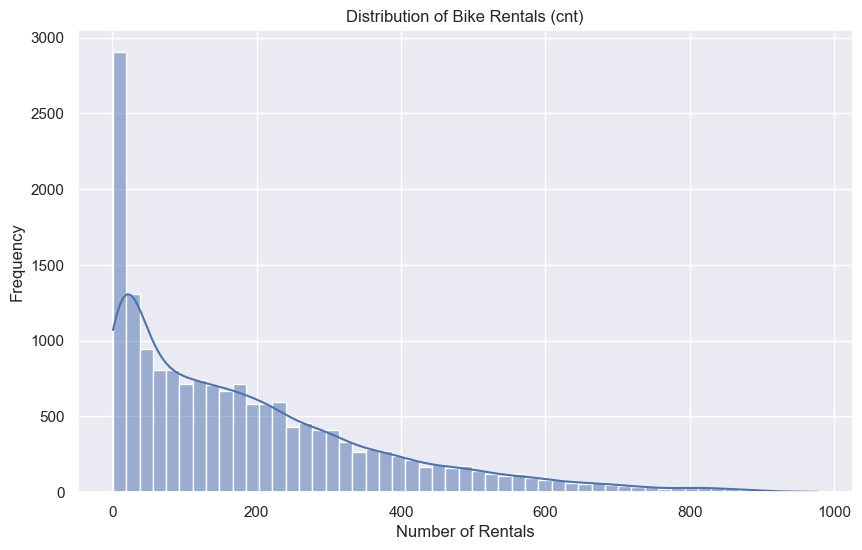

In [56]:
# Target Variable Analysis (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], kde=True)
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
print("\nSkewness of cnt:", hour_data['cnt'].skew())

### 1.2 Temporal Pattern Analysis
Examining how rental patterns vary by hour and season.

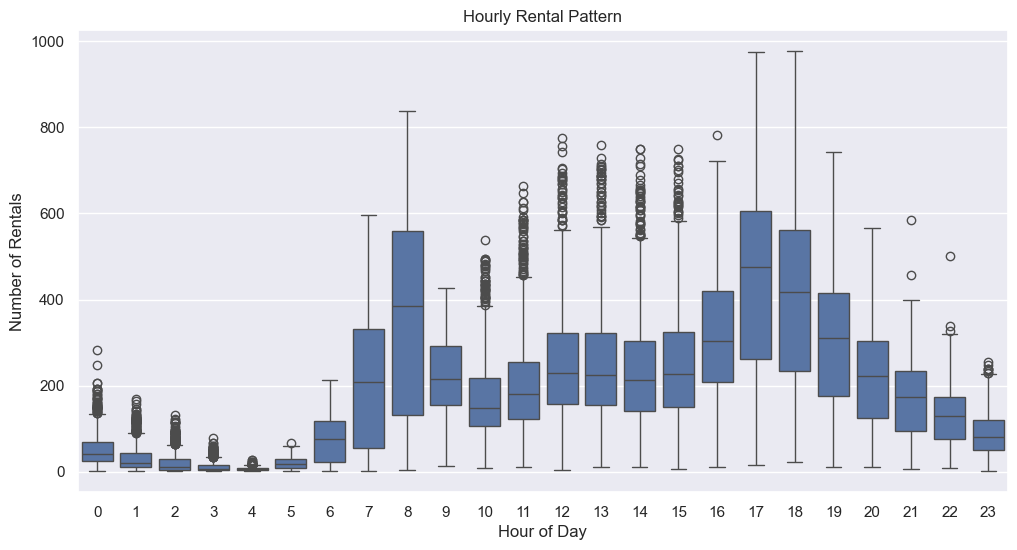

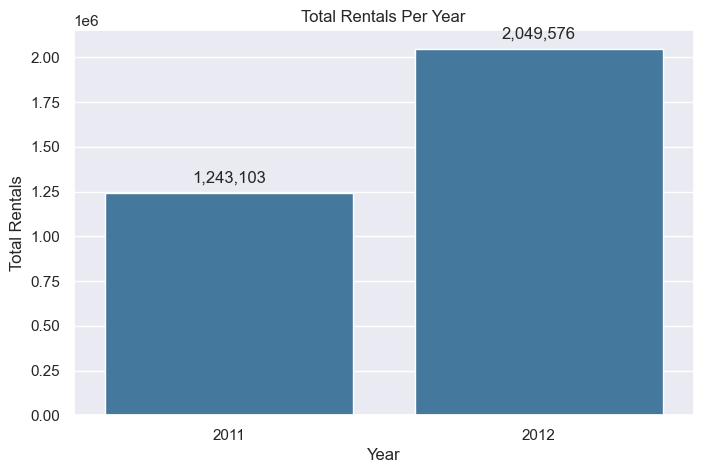

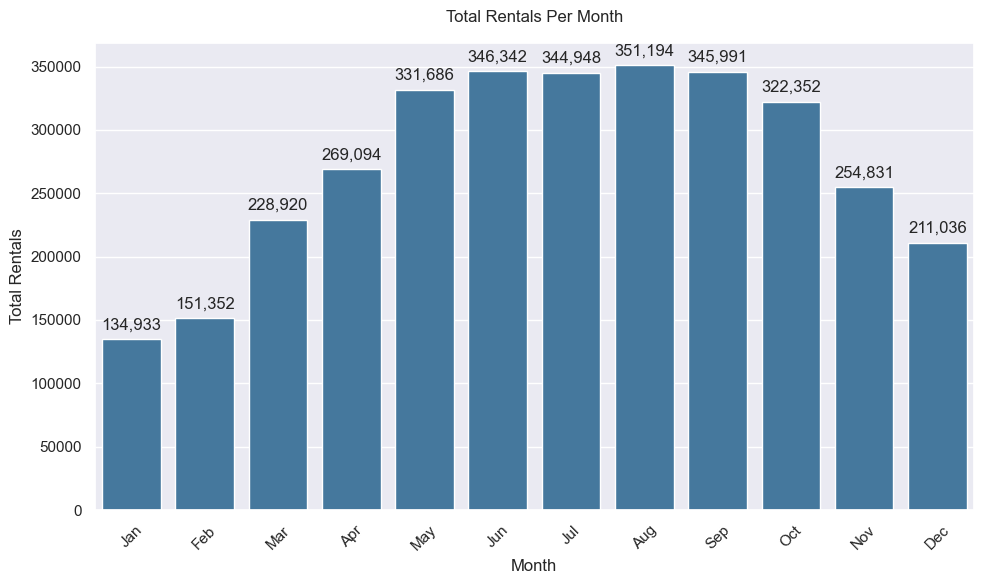

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hour analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=hour_data)
plt.title('Hourly Rental Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.show()

# Rentals per year
# Calculate total rentals per year - safer approach
yearly_rentals = hour_data.groupby('yr')['cnt'].sum().reset_index()
yearly_rentals['year'] = yearly_rentals['yr'].map({0: '2011', 1: '2012'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='year', y='cnt', data=yearly_rentals, 
                color=sns.color_palette("Blues_d")[3])
plt.title('Total Rentals Per Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom',
               xytext=(0, 5),
               textcoords='offset points')
plt.show()

# Rentals per month
# Calculate total rentals per month - more robust approach
monthly_rentals = hour_data.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='mnth', y='cnt', data=monthly_rentals, 
                color=sns.color_palette("Blues_d")[3])
plt.title('Total Rentals Per Month', pad=15)
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(ticks=range(12), 
          labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
          rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom',
               xytext=(0, 5),
               textcoords='offset points')

plt.tight_layout()
plt.show()

### 1.3 Holiday and Working Day Analysis
Investigating how holidays and working days affect rental patterns.

C:\Users\DAHoe\AppData\Local\Temp\ipykernel_5276\1017616823.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([holiday_labels[i] for i in [0, 1]])
C:\Users\DAHoe\AppData\Local\Temp\ipykernel_5276\1017616823.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([workingday_labels[i] for i in [0, 1]])


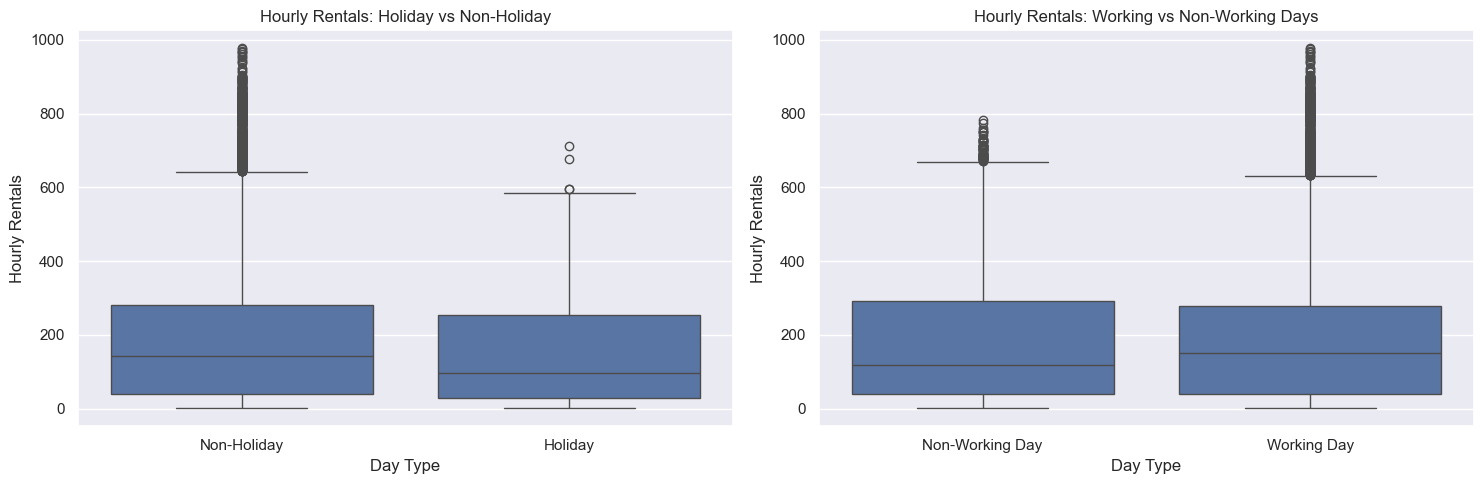

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Holiday analysis at hourly level
holiday_labels = {0: 'Non-Holiday', 1: 'Holiday'}
sns.boxplot(x='holiday', y='cnt', data=hour_data, ax=ax1)
ax1.set_title('Hourly Rentals: Holiday vs Non-Holiday')
ax1.set_xticklabels([holiday_labels[i] for i in [0, 1]])
ax1.set_xlabel('Day Type')
ax1.set_ylabel('Hourly Rentals')

# Working day analysis at hourly level
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
sns.boxplot(x='workingday', y='cnt', data=hour_data, ax=ax2)
ax2.set_title('Hourly Rentals: Working vs Non-Working Days')
ax2.set_xticklabels([workingday_labels[i] for i in [0, 1]])
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Hourly Rentals')

plt.tight_layout()

### 1.4 Weather Impact Analysis
Analyzing how different weather conditions affect rental behavior.

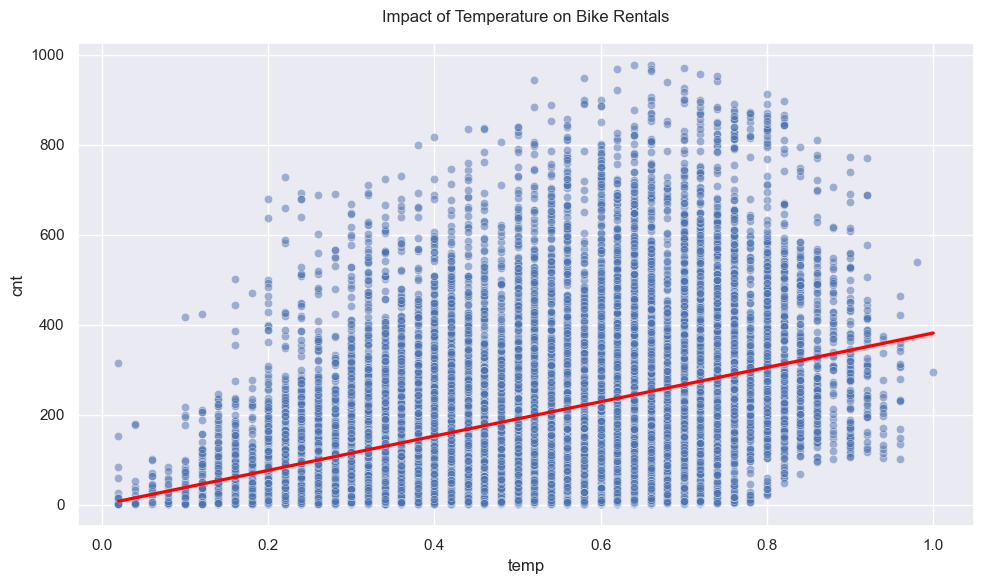

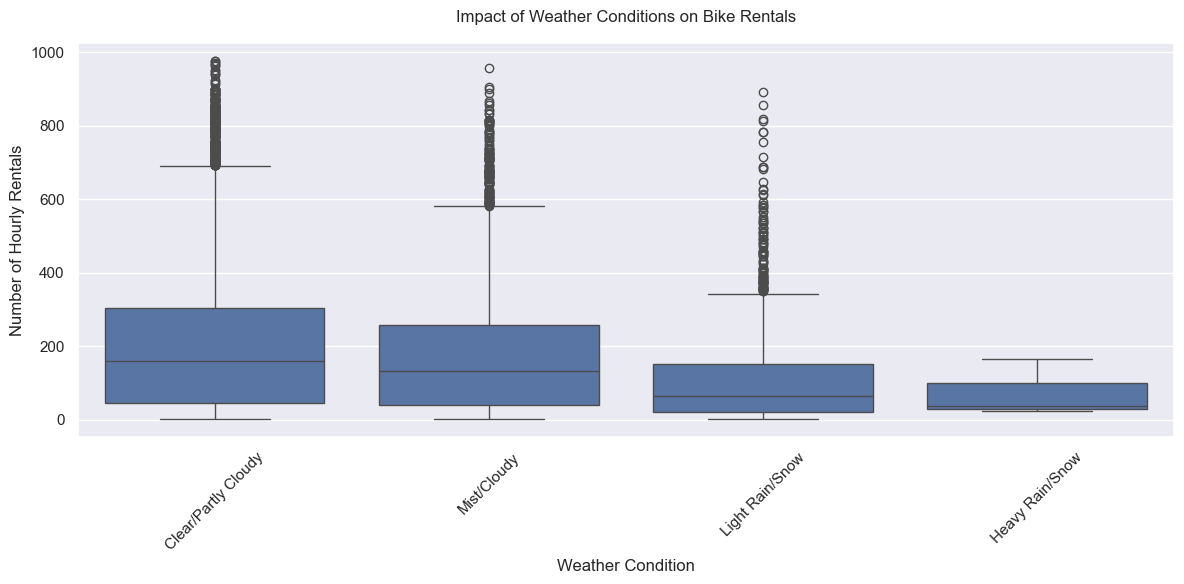

In [59]:
# Define weather situation mapping
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

# Temperature vs Count with improved styling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, alpha=0.5)
plt.title('Impact of Temperature on Bike Rentals', pad=15)
plt.xlabel('Temperature (Normalized 0-1 scale)')
plt.ylabel('Number of Hourly Rentals')

# Add trend line
sns.regplot(x='temp', y='cnt', data=hour_data, scatter=False, color='red')

plt.tight_layout()
plt.show()

# Weather Situation vs Count with descriptive labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_data)
plt.title('Impact of Weather Conditions on Bike Rentals', pad=15)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Hourly Rentals')

# Update x-axis labels with weather descriptions
plt.xticks(range(len(weather_labels)), 
          [weather_labels[i] for i in range(1, 5)], 
          rotation=45)

plt.tight_layout()
plt.show()

### 1.5 Feature Correlation Analysis
Examining relationships between numerical features.

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

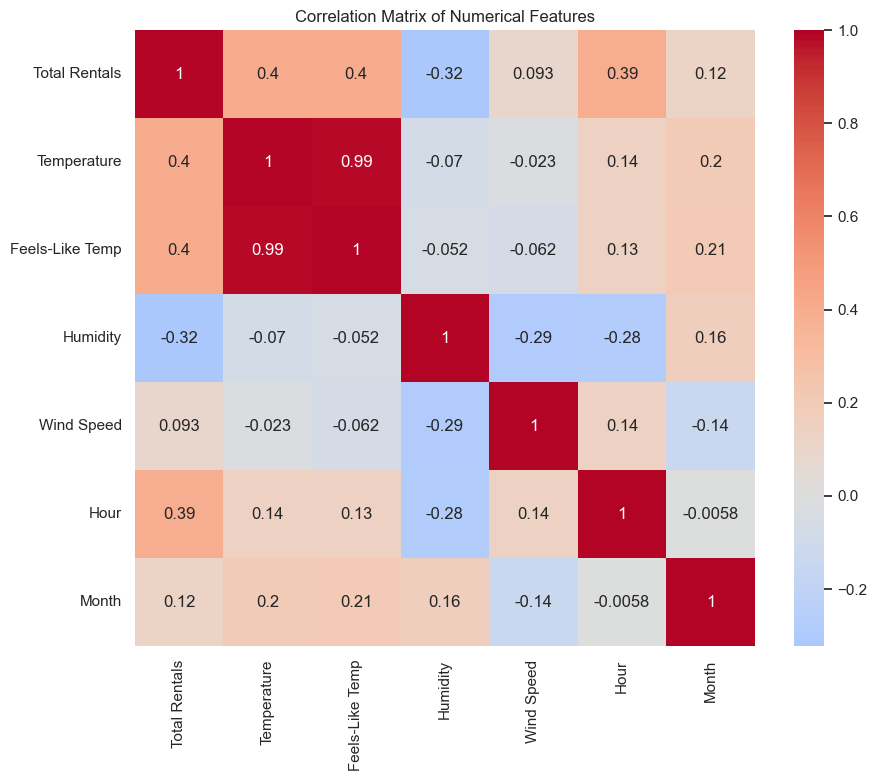

In [60]:
feature_labels = {
    'cnt': 'Total Rentals',
    'temp': 'Temperature',
    'atemp': 'Feels-Like Temp',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'hr': 'Hour',
    'mnth': 'Month'
}

correlation_features = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'hr', 'mnth']
correlation_matrix = hour_data[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            xticklabels=[feature_labels[col] for col in correlation_features],
            yticklabels=[feature_labels[col] for col in correlation_features])
plt.title('Correlation Matrix of Numerical Features')

In [61]:
# Calculate rental distribution statistics
print("1. Distribution Statistics:")
print(f"Mean rentals: {hour_data['cnt'].mean():.2f}")
print(f"Median rentals: {hour_data['cnt'].median():.2f}")
print(f"Skewness: {hour_data['cnt'].skew():.2f}")

# Calculate peak hours statistics
hourly_avg = hour_data.groupby('hr')['cnt'].mean()
peak_hours = hourly_avg.nlargest(3)
print("\n2. Peak Hours:")
print(peak_hours)

# Calculate weather correlations
print("\n3. Weather Correlations:")
print(f"Temperature correlation: {hour_data['cnt'].corr(hour_data['temp']):.2f}")
print(f"Humidity correlation: {hour_data['cnt'].corr(hour_data['hum']):.2f}")
print(f"Wind speed correlation: {hour_data['cnt'].corr(hour_data['windspeed']):.2f}")

1. Distribution Statistics:
Mean rentals: 189.46
Median rentals: 142.00
Skewness: 1.28

2. Peak Hours:
hr
17    461.452055
18    425.510989
8     359.011004
Name: cnt, dtype: float64

3. Weather Correlations:
Temperature correlation: 0.40
Humidity correlation: -0.32
Wind speed correlation: 0.09


We will drop the 'instant' and 'dteday' columns as they are not needed for our analysis. The 'instant' column is an index, and 'dteday' is a date column that we will not use in our analysis.
'casual' and 'registered' columns are also dropped as they are only gathered after bike rental. We will only use the 'cnt' column as our target variable.

In [62]:
# Drop index-like or redundant columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']

# Drop columns and create clean dataset
hour_data_clean = hour_data.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("Remaining columns:", hour_data_clean.columns.tolist())

# Update our working dataset
hour_data = hour_data_clean


Columns dropped: ['instant', 'dteday', 'casual', 'registered']
Remaining columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


Correlation between temp and atemp: 0.988

Correlations with rental count (cnt):
Temperature: 0.405
Apparent Temperature: 0.401


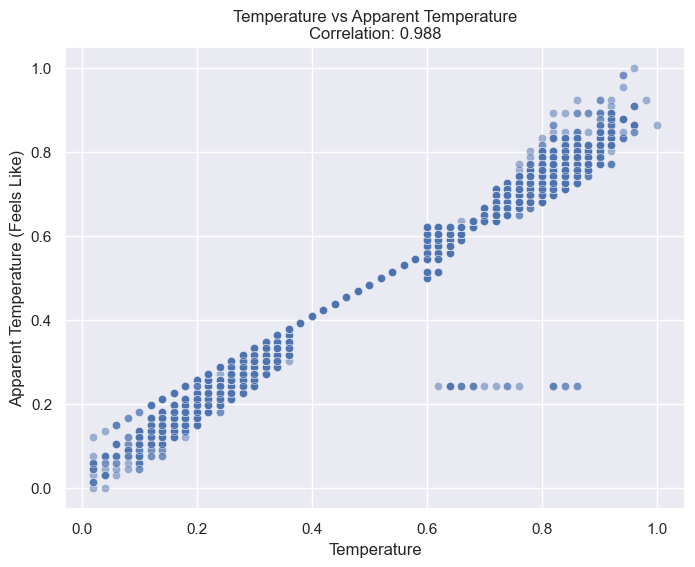

In [63]:
# Calculate correlation between temp and atemp
temp_correlation = hour_data['temp'].corr(hour_data['atemp'])

# Create visualization to show relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hour_data, x='temp', y='atemp', alpha=0.5)
plt.title(f'Temperature vs Apparent Temperature\nCorrelation: {temp_correlation:.3f}')
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature (Feels Like)')

# Print analysis
print(f"Correlation between temp and atemp: {temp_correlation:.3f}")

# Check their individual correlations with the target variable
temp_target_corr = hour_data['temp'].corr(hour_data['cnt'])
atemp_target_corr = hour_data['atemp'].corr(hour_data['cnt'])

print("\nCorrelations with rental count (cnt):")
print(f"Temperature: {temp_target_corr:.3f}")
print(f"Apparent Temperature: {atemp_target_corr:.3f}")

To avoid multicollinearity, we will drop the `temp` feature as it is highly correlated with `atemp`.

In [64]:
hour_data = hour_data.drop(columns=['temp'])
print("Columns remaining after dropping 'temp':", hour_data.columns.tolist())

Columns remaining after dropping 'temp': ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']


In [65]:
# Drop any remaining problematic columns
df_clean = hour_data
del hour_data

print("Final columns in cleaned dataset:", df_clean.columns.tolist())


Final columns in cleaned dataset: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']


## 2. Data Splitting


We will split our data into three sets:
- Training set (60%): Used to train the model
- Validation set (20%): Used to tune hyperparameters and evaluate model during training
- Test set (20%): Used for final model evaluation

This split helps us:
1. Avoid overfitting by evaluating on unseen data
2. Get an unbiased estimate of model performance
3. Fine-tune model parameters without contaminating test data


In [66]:
X = df_clean.drop('cnt', axis=1)
y = df_clean['cnt']

# Split into train (60%), validation (20%), and test (20%)
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 10427
Validation set size: 3476
Test set size: 3476


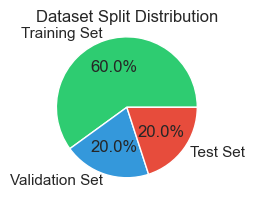

In [67]:
# Create a pie chart showing the data split proportions
import matplotlib.pyplot as plt

# Calculate percentages
total = len(X)
train_pct = len(X_train) / total * 100
val_pct = len(X_val) / total * 100 
test_pct = len(X_test) / total * 100

# Create pie chart
plt.figure(figsize=(2, 2))
plt.pie([train_pct, val_pct, test_pct], 
        labels=['Training Set', 'Validation Set', 'Test Set'],
        autopct='%1.1f%%',
        colors=['#2ecc71', '#3498db', '#e74c3c'])
plt.title('Dataset Split Distribution')
plt.axis('equal')
plt.show()


## 3. Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define feature types
numeric_features = ['atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'weathersit', 'holiday', 'workingday']
cyclical_features = ['hr', 'weekday']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create cyclical feature transformers
def create_cyclical_features(df, col, max_val):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

# Apply cyclical transformations
X_train_cyclical = X_train.copy()
X_val_cyclical = X_val.copy()
X_test_cyclical = X_test.copy()

for col, max_val in [('hr', 24), ('weekday', 7)]:
    X_train_cyclical = create_cyclical_features(X_train_cyclical, col, max_val)
    X_val_cyclical = create_cyclical_features(X_val_cyclical, col, max_val)
    X_test_cyclical = create_cyclical_features(X_test_cyclical, col, max_val)

# Update feature lists
numeric_features.extend(['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos'])
cyclical_features = []  # Remove original cyclical features

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train_cyclical)
X_val_processed = preprocessor.transform(X_val_cyclical)
X_test_processed = preprocessor.transform(X_test_cyclical)

# Get feature names after transformation
numeric_feature_names = numeric_features
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Convert to DataFrame for easier handling
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_val_processed = pd.DataFrame(X_val_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

## 4. Linear Regression

Validation Metrics:
MSE: 17429.4074
MAE: 95.2785
R2: 0.4640


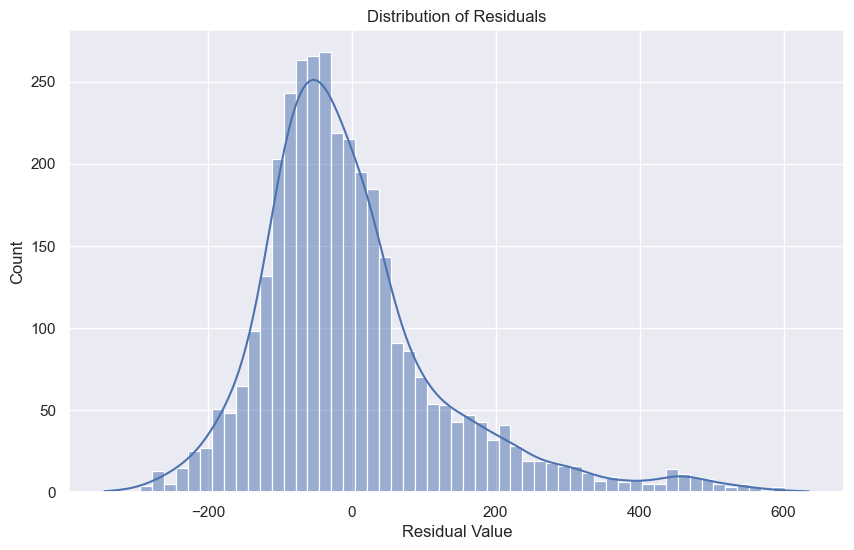


Bias-Variance Analysis:
Training R2: 0.4474
Validation R2: 0.4640


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_processed)
y_val_pred = lr_model.predict(X_val_processed)

# Calculate metrics
metrics = {
    'MSE': mean_squared_error(y_val, y_val_pred),
    'MAE': mean_absolute_error(y_val, y_val_pred),
    'R2': r2_score(y_val, y_val_pred)
}

print("Validation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_val - y_val_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.show()

# Analyze bias and variance
print("\nBias-Variance Analysis:")
print(f"Training R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Validation R2: {r2_score(y_val, y_val_pred):.4f}")

## 5. Random Forest Regression

Random Forest Validation Metrics:
MSE: 4382.5944
MAE: 44.1931
R2: 0.8652


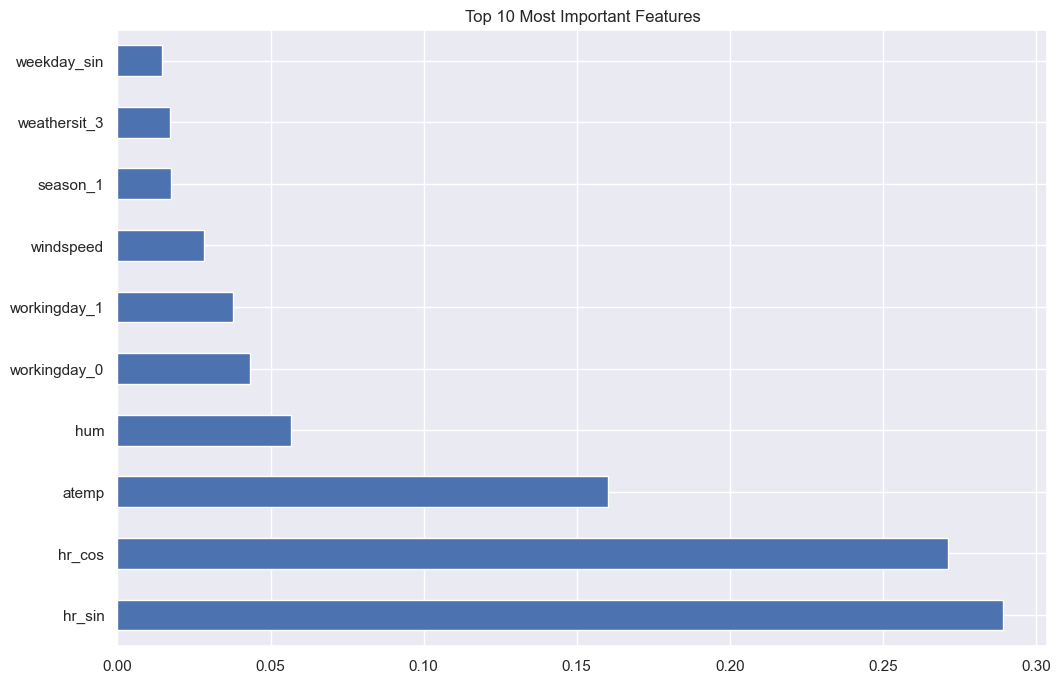


Comparison with Linear Regression:
MSE improvement: -74.86%
MAE improvement: -53.62%
R2 improvement: 86.48%


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_processed)
y_val_pred_rf = rf_model.predict(X_val_processed)

# Calculate metrics
metrics_rf = {
    'MSE': mean_squared_error(y_val, y_val_pred_rf),
    'MAE': mean_absolute_error(y_val, y_val_pred_rf),
    'R2': r2_score(y_val, y_val_pred_rf)
}

print("Random Forest Validation Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

# Feature importance plot
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()

# Compare with baseline
print("\nComparison with Linear Regression:")
for metric in metrics.keys():
    improvement = (metrics_rf[metric] - metrics[metric]) / abs(metrics[metric]) * 100
    print(f"{metric} improvement: {improvement:.2f}%")

In [ ]:
# Save the Random Forest model
import pickle

# Save the current model if tuned version isn't available yet
rf_model_path = os.path.join(checkpoint_dir, 'rf_model.pkl')
with open(rf_model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"Random Forest model saved to {rf_model_path}")

# We'll save the tuned version later after hyperparameter tuning

## 6. Gradient Boosting

XGBoost Validation Metrics:
MSE: 4029.7661
MAE: 43.2930
R2: 0.8761


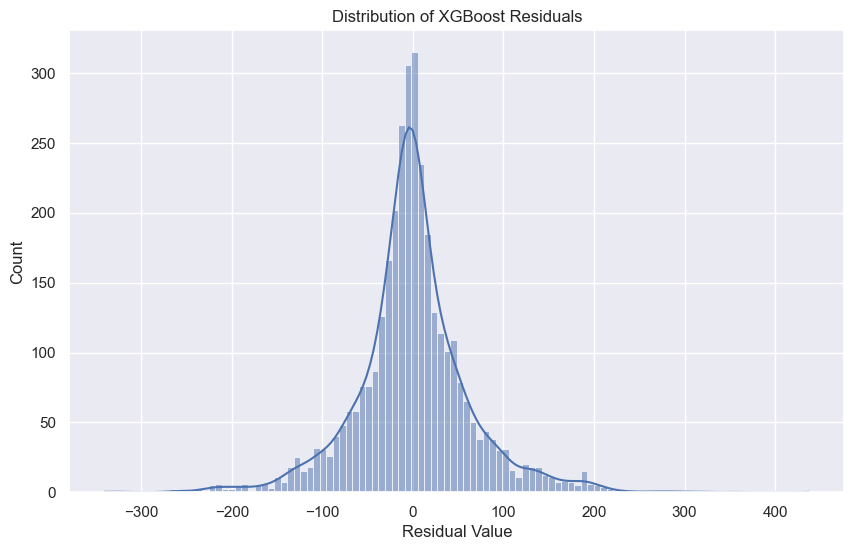


Comparison with Previous Models:
MSE improvement over RF: -8.05%
MSE improvement over LR: -76.88%
MAE improvement over RF: -2.04%
MAE improvement over LR: -54.56%
R2 improvement over RF: 1.25%
R2 improvement over LR: 88.82%


In [ ]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_processed)
y_val_pred_xgb = xgb_model.predict(X_val_processed)

# Calculate metrics
metrics_xgb = {
    'MSE': mean_squared_error(y_val, y_val_pred_xgb),
    'MAE': mean_absolute_error(y_val, y_val_pred_xgb),
    'R2': r2_score(y_val, y_val_pred_xgb)
}

print("XGBoost Validation Metrics:")
for metric, value in metrics_xgb.items():
    print(f"{metric}: {value:.4f}")

# Plot residuals
plt.figure(figsize=(10, 6))
residuals_xgb = y_val - y_val_pred_xgb
sns.histplot(residuals_xgb, kde=True)
plt.title('Distribution of XGBoost Residuals')
plt.xlabel('Residual Value')
plt.show()

# Compare with previous models
print("\nComparison with Previous Models:")
for metric in metrics.keys():
    improvement_rf = (metrics_xgb[metric] - metrics_rf[metric]) / abs(metrics_rf[metric]) * 100
    improvement_lr = (metrics_xgb[metric] - metrics[metric]) / abs(metrics[metric]) * 100
    print(f"{metric} improvement over RF: {improvement_rf:.2f}%")
    print(f"{metric} improvement over LR: {improvement_lr:.2f}%")

## 7. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Random Forest Tuning
rf_param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

rf_random_search.fit(X_train_processed, y_train)
print("Best Random Forest Parameters:", rf_random_search.best_params_)

# XGBoost Tuning
xgb_param_grid = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4)
}

xgb_random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

xgb_random_search.fit(X_train_processed, y_train)
print("\nBest XGBoost Parameters:", xgb_random_search.best_params_)

# Evaluate tuned models
tuned_rf = rf_random_search.best_estimator_
tuned_xgb = xgb_random_search.best_estimator_

y_val_pred_tuned_rf = tuned_rf.predict(X_val_processed)
y_val_pred_tuned_xgb = tuned_xgb.predict(X_val_processed)

print("\nTuned Model Performance:")
print("Random Forest:")
print(f"MSE: {mean_squared_error(y_val, y_val_pred_tuned_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred_tuned_rf):.4f}")
print(f"R2: {r2_score(y_val, y_val_pred_tuned_rf):.4f}")

print("\nXGBoost:")
print(f"MSE: {mean_squared_error(y_val, y_val_pred_tuned_xgb):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred_tuned_xgb):.4f}")
print(f"R2: {r2_score(y_val, y_val_pred_tuned_xgb):.4f}")

KeyboardInterrupt: 

In [ ]:
# Save the best XGBoost model
import pickle

# Save the tuned XGBoost model
xgb_model_path = os.path.join(checkpoint_dir, 'xgb_tuned_model.pkl')
with open(xgb_model_path, 'wb') as f:
    pickle.dump(tuned_xgb, f)

print(f"Tuned XGBoost model saved to {xgb_model_path}")

# Function to load the model if needed
def load_xgb_model(model_path=None):
    if model_path is None:
        model_path = os.path.join(checkpoint_dir, 'xgb_tuned_model.pkl')
    with open(model_path, 'rb') as f:
        return pickle.load(f)

## 8. Evalutaion/Refinement

In [ ]:
# Add interaction terms based on EDA insights
X_train_interactions = X_train_processed.copy()
X_val_interactions = X_val_processed.copy()
X_test_interactions = X_test_processed.copy()

# Add temp × humidity interaction
X_train_interactions['temp_hum_interaction'] = X_train_interactions['temp'] * X_train_interactions['hum']
X_val_interactions['temp_hum_interaction'] = X_val_interactions['temp'] * X_val_interactions['hum']
X_test_interactions['temp_hum_interaction'] = X_test_interactions['temp'] * X_test_interactions['hum']

# Retrain and evaluate models with new features
tuned_xgb.fit(X_train_interactions, y_train)
y_val_pred_refined = tuned_xgb.predict(X_val_interactions)

print("\nRefined Model Performance:")
print(f"MSE: {mean_squared_error(y_val, y_val_pred_refined):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred_refined):.4f}")
print(f"R2: {r2_score(y_val, y_val_pred_refined):.4f}")

# Compare with previous performance
improvement = (r2_score(y_val, y_val_pred_refined) - r2_score(y_val, y_val_pred_tuned_xgb)) / abs(r2_score(y_val, y_val_pred_tuned_xgb)) * 100
print(f"\nR2 Improvement after refinement: {improvement:.2f}%")

## 9. Final Model

In [ ]:
# Task 9: Final Model Selection and Testing
# =======================================

# Combine training and validation sets
X_final_train = pd.concat([X_train_interactions, X_val_interactions])
y_final_train = pd.concat([y_train, y_val])

# Train final model on combined data
final_model = tuned_xgb
final_model.fit(X_final_train, y_final_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_interactions)

print("\nFinal Model Test Performance:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"R2: {r2_score(y_test, y_test_pred):.4f}")

# Feature importance of final model
plt.figure(figsize=(12, 8))
final_importance = pd.Series(final_model.feature_importances_, index=X_final_train.columns)
final_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features in Final Model')
plt.show()

# Compare with validation performance
print("\nPerformance Comparison:")
print("Validation R2:", r2_score(y_val, y_val_pred_refined))
print("Test R2:", r2_score(y_test, y_test_pred))

In [ ]:
# Save the final model
final_model_path = os.path.join(checkpoint_dir, 'bike_rental_final_model.pkl')
with open(final_model_path, 'wb') as f:
    pickle.dump(final_model, f)

# Also save the feature preprocessor for future predictions
preprocessor_path = os.path.join(checkpoint_dir, 'feature_preprocessor.pkl')
with open(preprocessor_path, 'wb') as f:
    pickle.dump(preprocessor, f)

print(f"Final model saved to {final_model_path}")
print(f"Feature preprocessor saved to {preprocessor_path}")

In [ ]:
def predict_with_saved_model(X_new, model_path=None, preprocessor_path=None):
    """Make predictions with the saved model on new data."""
    # Use default paths if not provided
    if model_path is None:
        model_path = os.path.join(checkpoint_dir, 'bike_rental_final_model.pkl')
    if preprocessor_path is None:
        preprocessor_path = os.path.join(checkpoint_dir, 'feature_preprocessor.pkl')
        
    # Load model and preprocessor
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    with open(preprocessor_path, 'rb') as f:
        preprocessor = pickle.load(f)
    
    # Create cyclical features
    for col, max_val in [('hr', 24), ('weekday', 7)]:
        if col in X_new.columns:
            X_new[f'{col}_sin'] = np.sin(2 * np.pi * X_new[col]/max_val)
            X_new[f'{col}_cos'] = np.cos(2 * np.pi * X_new[col]/max_val)
    
    # Transform features
    X_processed = preprocessor.transform(X_new)
    X_processed = pd.DataFrame(X_processed, columns=feature_names)
    
    # Add interaction term
    X_processed['temp_hum_interaction'] = X_processed['atemp'] * X_processed['hum']
    
    # Make prediction
    return model.predict(X_processed)

In [ ]:
predict_with_saved_model(X_test_interactions.head(), model_path=final_model_path, preprocessor_path=preprocessor_path)